In [2]:
import numpy as np
import math
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import json
import pandas as pd
import pickle
import glob
import re
from tqdm import tqdm
from pathlib import Path
import sys,os

In [3]:
root = '/nas/lichangjian/open_fashion/'

In [4]:
p = '/nas/lichangjian/open_fashion/df_OpenFashion.csv'

In [5]:
openfashion_pd = pd.read_csv(p)

In [6]:
ofashion_catg = openfashion_pd[~(openfashion_pd['label_2']==-1)]

In [7]:
ofashion_catg.head()

,source,path,label,label_1,一级分类,label_2,二级分类,x_1,y_1,x_2,y_2
46,DeepFashion,/nas/lichangjian/open_fashion/DeepFashion/Cate...,Tank,4,上装,6,马甲/背心,38.0,66.0,146.0,268.0
47,DeepFashion,/nas/lichangjian/open_fashion/DeepFashion/Cate...,Tank,4,上装,6,马甲/背心,29.0,69.0,163.0,300.0
48,DeepFashion,/nas/lichangjian/open_fashion/DeepFashion/Cate...,Tank,4,上装,6,马甲/背心,42.0,63.0,253.0,199.0
49,DeepFashion,/nas/lichangjian/open_fashion/DeepFashion/Cate...,Tank,4,上装,6,马甲/背心,82.0,54.0,131.0,102.0
50,DeepFashion,/nas/lichangjian/open_fashion/DeepFashion/Cate...,Tank,4,上装,6,马甲/背心,97.0,88.0,195.0,171.0


In [2]:
names = {0: ['小西装', 'Suit_xizhuang'],
 1: ['毛衣/绒衣/针织衫', 'Sweater/knit'],
 2: ['女衫类', 'Blouses '],
 3: ['皮衣', 'leather'],
 4: ['夹克/外套', 'Jacket/coat '],
 5: ['风衣', 'dust coat'],
 6: ['背心', 'vest'],
 7: ['吊带', 'harness'],
 8: ['牛仔', 'cowboy'],
 9: ['羽绒服', 'Down jacket'],
 10: ['大衣', 'coat'],
 11: ['皮草', 'fur'],
 12: ['卫衣', 'fleece'],
 13: ['棉衣/羊羔绒', 'Padded coat'],
 14: ['斗篷', 'cloak'],
 15: ['裙子', 'skirt'],
 16: ['西装裤', 'Suit pants'],
 17: ['牛仔裤', 'Jeans'],
 18: ['休闲裤', 'Slacks'],
 19: ['打底裤', 'Leggings'],
 20: ['运动裤', 'Sweatpants'],
 21: ['连衣裙', 'Dress'],
 22: ['连衣裤', 'Jumpsuit'],
 23: ['正装女鞋', 'Suits shoes'],
 24: ['帆布鞋', 'Canvas shoes'],
 25: ['松糕鞋', 'Platform shoes'],
 26: ['洞洞鞋', 'Hole shoes'],
 27: ['懒人鞋', 'Lazy shoes'],
 28: ['板鞋', 'board shoes'],
 29: ['拖鞋', 'slippers'],
 30: ['凉鞋', 'sandals'],
 31: ['运动鞋', 'Sports shoes'],
 32: ['雪地靴', 'Ugg boots'],
 33: ['豆豆鞋', 'Doug shoes'],
 34: ['网鞋', 'Net shoes'],
 35: ['包', 'bag'],
 36: ['帽子', 'hat']
 }

<AxesSubplot:xlabel='label_1'>

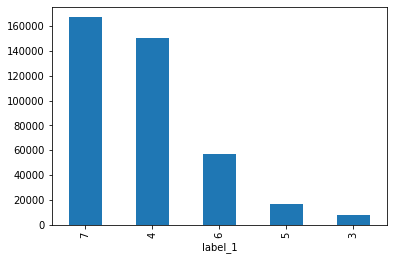

In [11]:
counter.plot.bar()

In [21]:
id_list = np.array(counter.axes)[0]
numbers = counter.values
name_list = [names[x][1] for x in id_list]
name_list = [str(x) + ':' + names[x][1] for x in id_list]

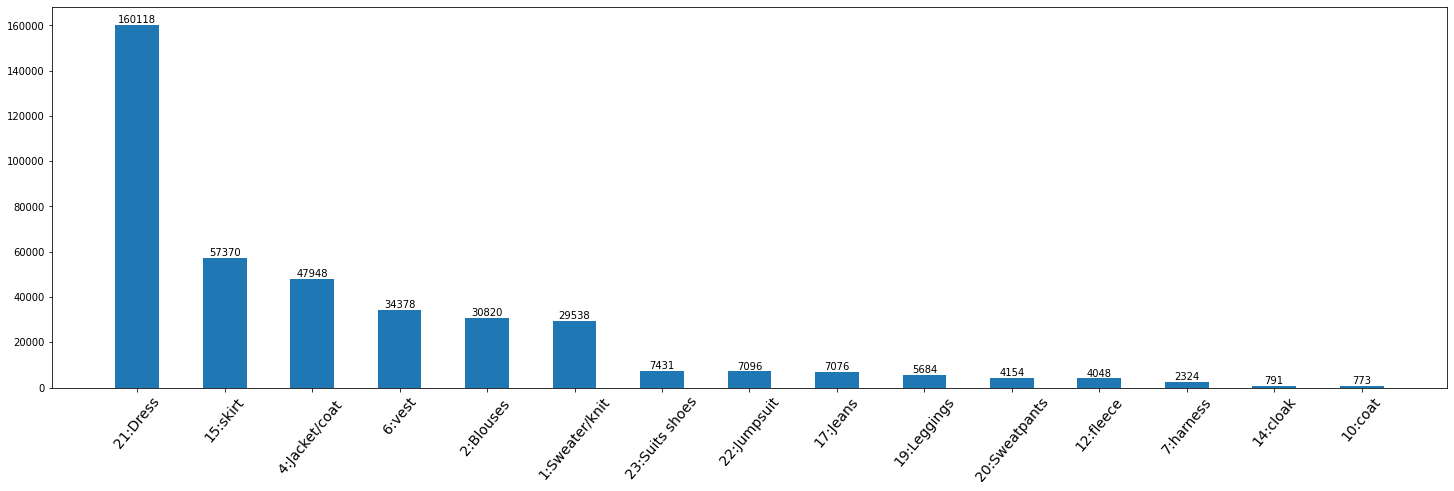

In [10]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=50, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

### Haowei34k

#### haowei34k conf

In [11]:
!ls /nas/chenyi/dataset_apparel_nas/

haowei34k  haowei34k_conf7.csv	haowei34k.tar  haowei_conf07_multi  openfashion


In [12]:
hw_data_p = '/nas/chenyi/dataset_apparel_nas/haowei34k_conf7.csv'

In [13]:
hw_data_df = pd.read_csv(hw_data_p)

In [14]:
hw_data_df.head()

,id,img_path,label_path,label_1,一级分类,label_2,二级分类,x_c,y_c,w,h,confidence
0,20141215090521289,/nas/lichangjian/ok_data/20141215090521289.jpg,/nas/lichangjian/labels/20141215090521289.txt,4,上装,0,小西装,0.454839,0.320250,0.412903,0.362912,0.961302
1,20141215090521289,/nas/lichangjian/ok_data/20141215090521289.jpg,/nas/lichangjian/labels/20141215090521289.txt,5,裤子,18,休闲裤,0.440323,0.627986,0.296774,0.470990,0.953829
2,20140924211054180,/nas/lichangjian/ok_data/20140924211054180.jpg,/nas/lichangjian/labels/20140924211054180.txt,4,上装,0,小西装,0.542500,0.343897,0.198333,0.387324,0.920288
3,20140924211054180,/nas/lichangjian/ok_data/20140924211054180.jpg,/nas/lichangjian/labels/20140924211054180.txt,5,裤子,16,西装裤,0.538333,0.660798,0.156667,0.485915,0.915438
4,20141204122102902,/nas/lichangjian/ok_data/20141204122102902.jpg,/nas/lichangjian/labels/20141204122102902.txt,4,上装,4,夹克/外套,0.486250,0.341667,0.322500,0.286667,0.781202


In [15]:
counter_hw = hw_data_df['label_2'].value_counts()

In [16]:
id_list = np.array(counter_hw.axes)[0]
numbers = counter_hw.values
name_list = [str(x) + ':' + names[x][1] for x in id_list]

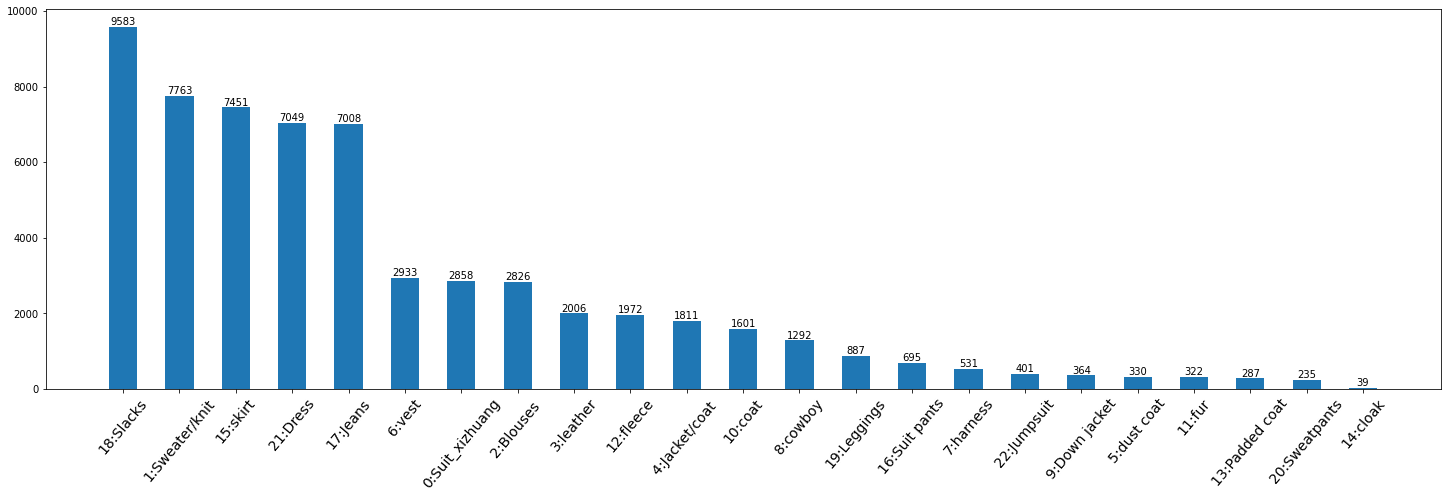

In [17]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=50, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()